In [11]:
# CNN and concatenate with MLP

import numpy as np
import librosa
import librosa.feature
import librosa.display
import glob
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

In [12]:
def display_mfcc(song):
    y, _ = librosa.load(song)
    mfcc = librosa.feature.mfcc(y)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show

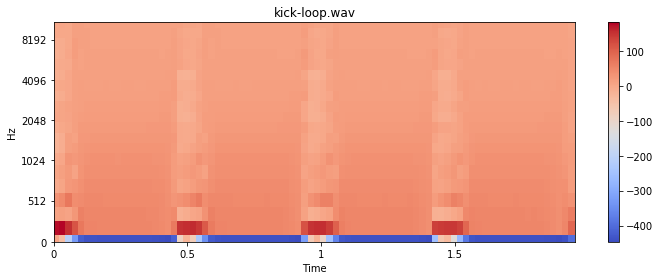

In [13]:
display_mfcc('kick-loop.wav')

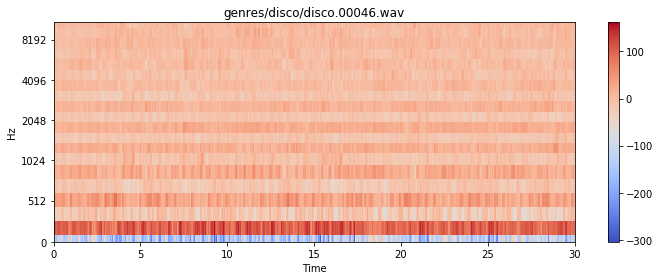

In [14]:
display_mfcc('genres/disco/disco.00046.wav')

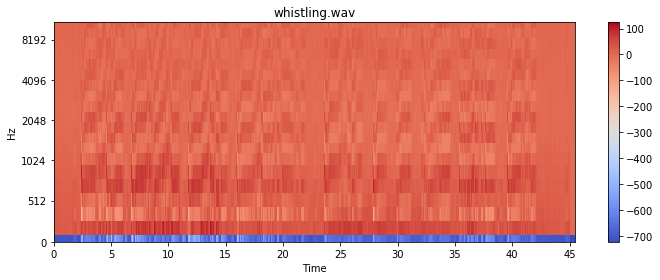

In [15]:
display_mfcc('whistling.wav')

In [16]:
def extract_features_song(f):
    y, sr = librosa.load(f)
    
    # Extracts tempo and frames at which beats occur
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    
    # Converts beat_frame to times
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    
    # Get mel-frequency cepstral coefficients 
    # Output is a matrix, np.bdarray which is an numpy.ndarray of size (n_mfcc, T)
    # T - track duration in frames
    
    mfcc = librosa.feature.mfcc(y)
    
    # normalize values between -1,1 (divide by max)
    mfcc /= np.amax(np.absolute(mfcc))
#     print(mfcc)
    
    return np.ndarray.flatten(mfcc)[:25000]
    


In [56]:
def one_hot(genres, labels):
    y_one_hot = []
    for label in labels:
        one_hot = []
        for genre in genres:
            if label == genre:
                one_hot.append(1)
            else:
                one_hot.append(0)
        y_one_hot.append(one_hot)
    return y_one_hot

In [70]:
def generate_features_and_labels():
    all_features = []
    all_labels = []
    
    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz','metal', 'pop', 'reggae', 'rock']
    for genre in genres:
        sound_files = glob.glob('genres/'+genre+'/*.wav')
        print('processing %d songs in %s genre...' % (len(sound_files), genre))
        for f in sound_files:
            features = extract_features_song(f)
            all_features.append(features)
            all_labels.append(genres.index(genre))
            
# convert labels to one-hot encoding
#     onehot_labels = one_hot(genres, all_labels)
#     label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
#     label_row_ids = label_row_ids.astype(np.int32, copy=False)
#     print(label_row_ids)
    onehot_labels = to_categorical(all_labels, num_classes=10)
#     print(np.stack(all_features), onehot_labels)
#     print(onehot_labels)
    return np.stack(all_features), onehot_labels
    

In [71]:
features, labels = generate_features_and_labels()
print('done')

processing 100 songs in blues genre...
processing 100 songs in classical genre...
processing 100 songs in country genre...
processing 100 songs in disco genre...
processing 100 songs in hiphop genre...
processing 100 songs in jazz genre...
processing 100 songs in metal genre...
processing 100 songs in pop genre...
processing 100 songs in reggae genre...
processing 100 songs in rock genre...
done


### Build model using CNN + MLP

In [59]:
labels

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0,

In [72]:
labels[999]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [7]:
ipd.Audio('genres/disco/disco.00046.wav')

In [52]:
import gc
gc.collect()

295

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers

In [74]:
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [75]:
# use test train split

# print(np.shape(features))
# print(np.shape(labels))

# training_split = 0.8

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features,
                                    labels, test_size = 0.2, random_state = 5)
# last column has genre, turn it into unique ids
# alldata = np.column_stack((features, labels))

# np.random.shuffle(alldata)
# splitidx = int(len(alldata) * training_split)
# train, test = alldata[:splitidx, :], alldata[splitidx:, :]

# print(np.shape(train))
# print(np.shape(test))

# train_input = train[:, :-10]
# train_labels = train[:, -10:]

# test_input = test[:,:-10]
# test_labels = test[:,-10:]

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))


(800, 25000)
(200, 25000)
(800, 10)
(200, 10)


In [76]:
# train_input.shape
# print(f' train input: {train_input.shape}')
# print(f' train labels: {train_labels.shape}')
# print(f' test_input: {test_input.shape}')
# print(f' test_labels: {test_labels.shape}')

# X_train = train_input
# X_test = test_input

# y_train = train_labels
# y_test = test_labels
print(y_test)

print(f' train input: {X_train.shape}')
print(f' test_input: {X_test.shape}')
print('_______________________________')
print(f' train labels: {y_train.shape}')
print(f' test_labels: {y_test.shape}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
 train input: (800, 25000)
 test_input: (200, 25000)
_______________________________
 train labels: (800, 10)
 test_labels: (200, 10)


In [77]:
# Defining our MLP model

model = Sequential()

model.add(Dense(512, input_shape=(25000,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [78]:
from tensorflow.keras.optimizers import SGD
# Use Categorical Cross-Entropy as loss function
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               12800512  
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 13,068,298
Trainable params: 13,068,298
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
history = model.fit(x=X_train, y=y_train,
                   batch_size = 32,
                   epochs = 100,
                   verbose = 1,
                   validation_data=(X_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 2.1891 - accuracy: 0.1863 - val_loss: 2.1168 - val_accuracy: 0.2150
Epoch 2/100
800/800 [==============================] - 1s 840us/step - loss: 2.0317 - accuracy: 0.2688 - val_loss: 1.9838 - val_accuracy: 0.2450
Epoch 3/100
800/800 [==============================] - 1s 848us/step - loss: 1.9126 - accuracy: 0.3313 - val_loss: 1.8980 - val_accuracy: 0.3750
Epoch 4/100
800/800 [==============================] - 1s 828us/step - loss: 1.8280 - accuracy: 0.3775 - val_loss: 1.8620 - val_accuracy: 0.3100
Epoch 5/100
800/800 [==============================] - 1s 833us/step - loss: 1.7507 - accuracy: 0.4137 - val_loss: 1.7736 - val_accuracy: 0.4100
Epoch 6/100
800/800 [==============================] - 1s 965us/step - loss: 1.6900 - accuracy: 0.4300 - val_loss: 1.7217 - val_accuracy: 0.4250
Epoch 7/100
800/800 [==============================] - 1s 889us/step - loss: 1.6297 - 

Epoch 57/100
800/800 [==============================] - 1s 919us/step - loss: 0.2606 - accuracy: 0.9862 - val_loss: 1.4385 - val_accuracy: 0.5050
Epoch 58/100
800/800 [==============================] - 1s 922us/step - loss: 0.2816 - accuracy: 0.9638 - val_loss: 1.4975 - val_accuracy: 0.4650
Epoch 59/100
800/800 [==============================] - 1s 907us/step - loss: 0.2502 - accuracy: 0.9800 - val_loss: 1.3958 - val_accuracy: 0.5250
Epoch 60/100
800/800 [==============================] - 1s 918us/step - loss: 0.2406 - accuracy: 0.9787 - val_loss: 1.4280 - val_accuracy: 0.5250
Epoch 61/100
800/800 [==============================] - 1s 936us/step - loss: 0.2221 - accuracy: 0.9825 - val_loss: 1.4696 - val_accuracy: 0.4900
Epoch 62/100
800/800 [==============================] - 1s 935us/step - loss: 0.2204 - accuracy: 0.9787 - val_loss: 1.4761 - val_accuracy: 0.4900
Epoch 63/100
800/800 [==============================] - 1s 910us/step - loss: 0.2169 - accuracy: 0.9725 - val_loss: 1.5260 -

In [ ]:
######################################################

In [80]:
gc.collect()

20

In [82]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# Define the model

bd_model = Sequential()
bd_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
bd_model.add(BatchNormalization())
bd_model.add(Conv2D(64, (3, 3), activation='relu'))
bd_model.add(BatchNormalization())
bd_model.add(MaxPool2D(pool_size=(2, 2)))
bd_model.add(Dropout(0.25))
bd_model.add(Flatten())
bd_model.add(Dense(128, activation='relu'))
bd_model.add(BatchNormalization())
bd_model.add(Dropout(0.5))
bd_model.add(Dense(10, activation='softmax'))

bd_model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

print(bd_model.summary())

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x1c41522890>

In [80]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [81]:
model = get_model()

NameError: name 'feature_dim_1' is not defined

In [28]:
# sequential model, layers being added in sequentially
# add drop out??  maybe drop 10% randomly
# convolution neural net
model = Sequential([
    Dense(100, input_dim=np.shape(train_input)[1]),
    Activation('relu'),
    #keep output layer to 10 (10 categories)
    Dense(10),
    Activation('softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

model.fit(train_input, train_labels, epochs=50, batch_size=32, validation_split=.2)

loss,acc = model.evaluate(test_input, test_labels, batch_size=32)

print(f'Loss: {loss}, accuracy {acc}')

NameError: name 'train_input' is not defined